In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Образование

In [ ]:
full_data = pd.read_excel('том 3. Таблица 1 образование.xlsx')
data = full_data.fillna('')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head(10)

,"1. НАСЕЛЕНИЕ ПО ВОЗРАСТУ, ПОЛУ И УРОВНЮ ОБРАЗОВАНИЯ ПО МУНИЦИПАЛЬНЫМ ОБРАЗОВАНИЯМ",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,,,,,,,,,,,,,,,,,,,
1,г. Москва,,,,,,,,,,,,,,,,,,
2,,Всего,Указавшие уровень образо-\nвания,в том числе,,,,,,,,,,,,,,,Не\nуказавшие\nуровень\nобразо-\nвания
3,,,,имеющие профессиональное образование,,,,,,,,,имеющие общее образование,,,,не имеющие\n образо-вания,из них негра-\nмотные,
4,,,,кадры высшей квалифи-кации,высшее,в том числе по уровням,,,неполное высшее (незакон-ченное высшее),среднее профес-сиональное,в том числе,,среднее,основное,началь-\nное,дошкольное,,,
5,,,,,,магистратура,специалитет,бакалавриат,,,специалист среднего звена,"квалифици-\nрован-\nный рабо-чий, служа-щий",,,,,,,
6,А,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
7,Городское население,,,,,,,,,,,,,,,,,,
8,Мужчины и женщины в возрасте 6 лет и более,12449287,8188107,159381,2870186,313204,1648291,908691,352154,2227573,1253758,973815,1022000,679612,508896,277356,90949,1818,4261180
9,"в том числе в возрасте, лет:",,,,,,,,,,,,,,,,,,


**Имена стоблцов**

В первых пяти строках весь заголовок, надо что-то с этим сделать. Возьмем пятую строку как основной заголовок, если она пустая поднимаемся выше и берем значение из этой строки за заголовок, если и она пустая, то снова идем выше и так далее.

In [ ]:
names = []
for col in data.columns:
  row = 5
  while row > 0:
    if data[col][row]:
      names.append(data[col][row])
      break
    else:
      row-= 1

names = [name.replace('-\n', '').replace('\n',' ').replace('-', '') for name in names]

In [ ]:
names

['г. Москва',
 'Всего',
 'Указавшие уровень образования',
 'кадры высшей квалификации',
 'высшее',
 'магистратура',
 'специалитет',
 'бакалавриат',
 'неполное высшее (незаконченное высшее)',
 'среднее профессиональное',
 'специалист среднего звена',
 'квалифицированный рабочий, служащий',
 'среднее',
 'основное',
 'начальное',
 'дошкольное',
 'не имеющие  образования',
 'из них неграмотные',
 'Не указавшие уровень образования']

In [ ]:
# Берем 7 строку за заголовок, так как она из уникальных элементов состоит
education = pd.read_excel('том 3. Таблица 1 образование.xlsx', sheet_name=None, header = [7])

In [ ]:
education['г. Москва'].head(22)

,А,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Мужчины и женщины в возрасте 6 лет и более,12449287.0,8188107.0,159381,2870186,313204,1648291,908691,352154,2227573,1253758,973815,1022000,679612,508896,277356.0,90949.0,1818.0,4261180.0
2,"в том числе в возрасте, лет:",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6 – 9,488493.0,339618.0,-,-,-,-,-,-,-,-,-,-,-,-,261068.0,78550.0,416.0,148875.0
4,10 – 14,579930.0,412791.0,-,-,-,-,-,-,-,-,-,-,-,396200,12542.0,4049.0,89.0,167139.0
5,15 – 17,339549.0,233791.0,-,-,-,-,-,-,352,-,352,45832,133330,52676,349.0,1252.0,48.0,105758.0
6,18 – 19,280896.0,188047.0,-,-,-,-,-,-,18921,10416,8505,130171,34658,3942,132.0,223.0,39.0,92849.0
7,20 – 24,849562.0,518639.0,14,129023,8923,18268,101832,28677,101709,56300,45409,193821,58391,6232,231.0,541.0,165.0,330923.0
8,25 – 29,721033.0,461476.0,5199,244838,44186,83636,117016,31586,104341,58645,45696,41047,31093,2745,130.0,497.0,177.0,259557.0
9,30 – 34,1092254.0,703239.0,12800,373972,43041,205034,125897,40980,170891,95890,75001,53104,44952,5092,621.0,827.0,319.0,389015.0


In [ ]:
for sheet in education:
  xls = education[sheet][:21]  # берем только первых 21 строк, это соответвует статистике для всех (и мужчинам и женщинам вместе)
  xls = xls.drop(index = [0, 2]) #дропаем строки 0 и 2 - они бесполезные
  xls = xls.set_index('А') # в качестве столбца индексов берем столбец A
  xls = xls.drop(columns = [1]) #дропаем стоблцы
  xls = xls.replace('-', 0) # вместо черточек ставим нули, так как у нас численная статистика
  xls.columns = names[2:] # от 2-ого так как в names первым элементом идет округ, а вторым заголовок для стобца А, который теперь индексовый
  xls = xls.drop(index = ['Мужчины и женщины в возрасте 6 лет и более']) # тоже решил дропнуть, мы это всегда сами посчитать сможем
  xls.index.name = 'Возраст' # индекс А переименуем в возраст
  education[sheet] = xls # перепишем наш словарь с листами таблиц

In [ ]:
education['г. Москва'].head()

,Указавшие уровень образования,кадры высшей квалификации,высшее,магистратура,специалитет,бакалавриат,неполное высшее (незаконченное высшее),среднее профессиональное,специалист среднего звена,"квалифицированный рабочий, служащий",среднее,основное,начальное,дошкольное,не имеющие образования,из них неграмотные,Не указавшие уровень образования
Возраст,,,,,,,,,,,,,,,,,
6 – 9,339618.0,0,0,0,0,0,0,0,0,0,0,0,0,261068.0,78550.0,416.0,148875.0
10 – 14,412791.0,0,0,0,0,0,0,0,0,0,0,0,396200,12542.0,4049.0,89.0,167139.0
15 – 17,233791.0,0,0,0,0,0,0,352,0,352,45832,133330,52676,349.0,1252.0,48.0,105758.0
18 – 19,188047.0,0,0,0,0,0,0,18921,10416,8505,130171,34658,3942,132.0,223.0,39.0,92849.0
20 – 24,518639.0,14,129023,8923,18268,101832,28677,101709,56300,45409,193821,58391,6232,231.0,541.0,165.0,330923.0


# Визуализация статистики

Text(0, 0.5, 'Количество людей')

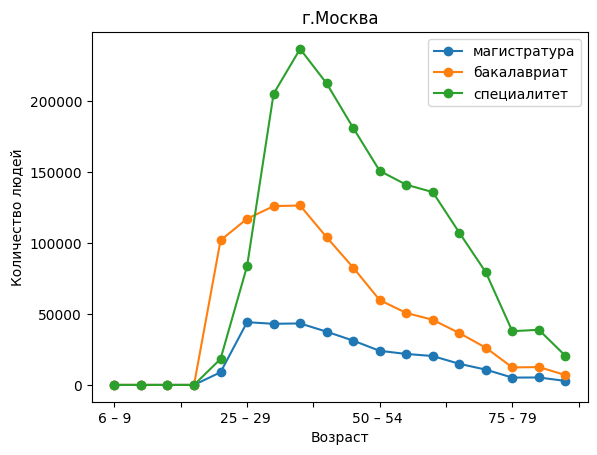

In [ ]:
plt.title('г.Москва')
education['г. Москва']['магистратура'].plot(ls = '-', marker = 'o', legend = True)
education['г. Москва']['бакалавриат'].plot(ls = '-', marker = 'o', legend = True)
education['г. Москва']['специалитет'].plot(ls = '-', marker = 'o', legend = True)
plt.ylabel('Количество людей')

Text(0, 0.5, 'Количество бакалавров')

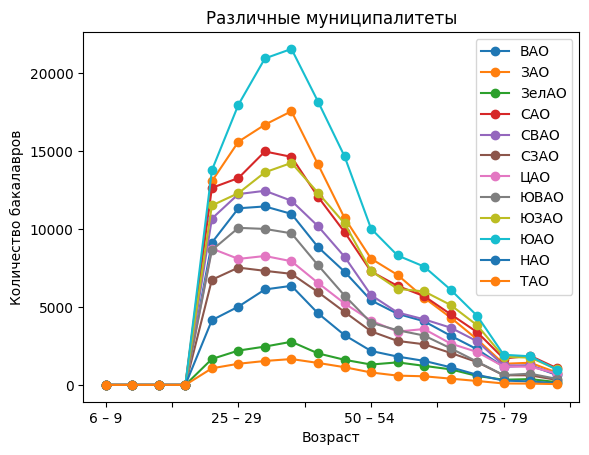

In [ ]:
muns = [name for name in education if 'Муниципальн' in name ] #ищем имена в которых есть слово Муниципальный в любом роде поэтому без окончания
plt.title('Различные муниципалитеты')
for sheet in muns:
  education[sheet]['бакалавриат'].plot(ls = '-', marker = 'o', legend = True, label = sheet.split()[-1])
plt.ylabel('Количество бакалавров')

# Визуализация округов на карте москвы

In [ ]:
!gdown --id "1jQ-dhgZXdEEoPggomDL7B3E2CmA7ILmi"
import geopandas as gpd
geo_rayon = gpd.read_file('/content/mo-shape.zip') # Полигоны для построения районов http://gis-lab.info/data/mos-adm/mo-shape.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jQ-dhgZXdEEoPggomDL7B3E2CmA7ILmi
To: /content/mo-shape.zip
100% 428k/428k [00:00<00:00, 8.49MB/s]


In [ ]:
geos = [geo.replace('Поселение ', '')[:-2] for geo in sorted(education.keys())] # убираем слово Поселение и окончание слова, т.к. в двух местах окончания разные
geos_new = [geo[:-2].replace('ё', 'е') for geo in geo_rayon['NAME']] # тоже убираем окончание и заменяем ё на е
dict_names = dict(zip(geos, sorted(education.keys()))) #делаем словарь соответсвия между реальными именами и обрезанными

In [ ]:
education[sheet].columns

Index(['Указавшие уровень образования', 'кадры высшей квалификации', 'высшее',
       'магистратура', 'специалитет', 'бакалавриат',
       'неполное высшее (незаконченное высшее)', 'среднее профессиональное',
       'специалист среднего звена', 'квалифицированный рабочий, служащий',
       'среднее', 'основное', 'начальное', 'дошкольное',
       'не имеющие  образования', 'из них неграмотные',
       'Не указавшие уровень образования'],
      dtype='object')

In [ ]:
geo_rayon['new_name'] = geos_new
col = 'не имеющие  образования'
geo_rayon[col] = -1 # изначально все заполняем -1, это значение будет означать, что для этого района статистики нет

In [ ]:
# заполняем новый столбец если совпадают обрезанные имена, заполняем полным числом людей по всем возрастам
for geo in geos:
  if geo in geos_new:
    name = dict_names[geo]
    geo_rayon.loc[geo_rayon['new_name'] == geo, col] = education[name][col].sum()

In [ ]:
import folium
import json

def party_color(feature):
    fillOpacity = 0.6
    if (feature['properties'][col]*100/maxn) < 0: # нет информации
        color = 'gray'
        fillOpacity = 0.1
    if (feature['properties'][col]*100/maxn)>0: #0 - 20%
        color = 'red'
    if (feature['properties'][col]*100/maxn)>20: #20 - 40%
        color = 'yellow'
    if (feature['properties'][col]*100/maxn)>40: #40 - 60%
        color = 'green'
    if (feature['properties'][col]*100/maxn)>60: #60 - 80%
        color = 'blue'
    if (feature['properties'][col]*100/maxn)>80: #80 - 100%
        color = 'darkblue'
    return {"fillColor":color, "fillOpacity":fillOpacity,"opacity":0}

def popup_html(feature):
    html = '<h5> Район {}</h5>'.format(feature['properties']['NAME'])
    html += '<br><b>Количество</b>: {}'.format(feature['properties'][col])
    return html # в описание кладем название района и число по признаку (здесь количество людей без образования)

m = folium.Map(location=[55.764414, 37.647859], zoom_start=10)

maxn = geo_rayon[col].max()
for mo in json.loads(geo_rayon.to_json())['features']:
    gj = folium.GeoJson(data=mo, style_function = party_color, control=False, highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8}, smooth_factor=0)
    folium.Popup(popup_html(mo)).add_to(gj)
    gj.add_to(m)


In [ ]:
m

# Основной источник дохода

In [ ]:
full_data = pd.read_excel('том 7. Таблица 4 источники средств существования.xlsx')
data = full_data.fillna('')

In [ ]:
data.head(10)

,"4. НАСЕЛЕНИЕ ПО ОСНОВНОМУ ИСТОЧНИКУ СРЕДСТВ К СУЩЕСТВОВАНИЮ, ВОЗРАСТНЫМ ГРУППАМ И ПОЛУ \nПО МУНИЦИПАЛЬНЫМ ОБРАЗОВАНИЯМ",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,,,,,,,,,,,,
1,Муниципальные образования Восточного округа,,,,,,,,,,,
2,,,,,,,,,,,,
3,,"Население, указавшее основной источник средств...",в том числе,,,,,,,,,
4,,,заработ-ная плата,"предпри-нима-тельский доход, самоза-нятость",производ-ство товаров для собствен-ного исполь...,"пенсии, пособия и другие выплаты от организаци...",стипендия,"сбережения, дивиденды, проценты, ссуды, реализ...",сдачу в аренду имущества,"доход от патентов, авторских прав","обеспе-чение со стороны других лиц, иждивение",иной источник средств к существова-\nнию
5,Городское население,,,,,,,,,,,
6,Мужчины и женщины,949501,481843,12881,1679,191941,8178,2364,1694,471,247756,694
7,из них в возрасте:,,,,,,,,,,,
8,моложе трудоспособного,148416,141,5,10,3913,57,84,47,59,144044,56
9,трудоспособном,572618,426153,11827,1459,20398,8113,1860,1222,304,100679,603


In [ ]:
names = []
for col in data.columns:
  row = 4
  while row > 0:
    if data[col][row]:
      names.append(data[col][row])
      break
    else:
      row-= 1

names = [name.replace('-\n', '').replace('\n',' ').replace('-', '') for name in names]

In [ ]:
income = pd.read_excel('том 7. Таблица 4 источники средств существования.xlsx', sheet_name=None, header = [5])

In [ ]:
income['Академическое'].head(7)

,Unnamed: 0,Unnamed: 1,заработ-ная плата,"предпри-нима-тельский доход, самоза-нятость",производ-ство товаров для собствен-ного исполь-зования,"пенсии, пособия и другие выплаты от организаций, государства",стипендия,"сбережения, дивиденды, проценты, ссуды, реализация капитала",сдачу в аренду имущества,"доход от патентов, авторских прав","обеспе-чение со стороны других лиц, иждивение",иной источник средств к существова-\nнию
0,Городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Мужчины и женщины,66024.0,37140.0,1234,73,14657.0,1010,258.0,272.0,93.0,11244.0,43
2,из них в возрасте:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,моложе трудоспособного,6705.0,36.0,1,-,166.0,10,7.0,5.0,8.0,6469.0,3
4,трудоспособном,41841.0,33483.0,1118,65,1059.0,1000,215.0,215.0,72.0,4576.0,38
5,старше трудоспособного,17478.0,3621.0,115,8,13432.0,-,36.0,52.0,13.0,199.0,2
6,Мужчины,29348.0,17613.0,712,29,5124.0,424,143.0,124.0,39.0,5116.0,24


In [ ]:
for sheet in income:
  xls = income[sheet]
  xls = xls[3:6].set_index('Unnamed: 0')
  xls = xls.replace('-', 0)
  xls.columns = names[1:]
  xls.index.name = 'Возраст'
  income[sheet] = xls

In [ ]:
income['Академическое'].head(7)

,"Население, указавшее основной источник средств к существованию",заработная плата,"предпринимательский доход, самозанятость",производство товаров для собственного использования,"пенсии, пособия и другие выплаты от организаций, государства",стипендия,"сбережения, дивиденды, проценты, ссуды, реализация капитала",сдачу в аренду имущества,"доход от патентов, авторских прав","обеспечение со стороны других лиц, иждивение",иной источник средств к существованию
Возраст,,,,,,,,,,,
моложе трудоспособного,6705.0,36.0,1,0,166.0,10,7.0,5.0,8.0,6469.0,3
трудоспособном,41841.0,33483.0,1118,65,1059.0,1000,215.0,215.0,72.0,4576.0,38
старше трудоспособного,17478.0,3621.0,115,8,13432.0,0,36.0,52.0,13.0,199.0,2


In [ ]:
income[sheet].columns

Index(['Население, указавшее основной источник средств к существованию',
       'заработная плата', 'предпринимательский доход, самозанятость',
       'производство товаров для собственного использования ',
       'пенсии, пособия и другие выплаты от организаций, государства',
       'стипендия ',
       'сбережения, дивиденды, проценты, ссуды, реализация капитала',
       'сдачу в аренду имущества ', 'доход от патентов, авторских прав',
       'обеспечение со стороны других лиц, иждивение',
       'иной источник средств к существованию'],
      dtype='object')

In [ ]:
col = 'пенсии, пособия и другие выплаты от организаций, государства'
geo_rayon[col] = -1

In [ ]:
for geo in geos:
  if geo in geos_new:
    name = dict_names[geo]
    geo_rayon.loc[geo_rayon['new_name'] == geo, col] = income[name][col].sum()

In [ ]:
m = folium.Map(location=[55.764414, 37.647859], zoom_start=10)

maxn = geo_rayon[col].max()
for mo in json.loads(geo_rayon.to_json())['features']:
    gj = folium.GeoJson(data=mo, style_function = party_color, control=False, highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8}, smooth_factor=0)
    folium.Popup(popup_html(mo)).add_to(gj)
    gj.add_to(m)

In [ ]:
m

In [ ]:
education['Академическое'].head()

,Указавшие уровень образования,кадры высшей квалификации,высшее,магистратура,специалитет,бакалавриат,неполное высшее (незаконченное высшее),среднее профессиональное,специалист среднего звена,"квалифицированный рабочий, служащий",среднее,основное,начальное,дошкольное,не имеющие образования,из них неграмотные,Не указавшие уровень образования
Возраст,,,,,,,,,,,,,,,,,
6 – 9,2100.0,0,0,0,0,0,0,0,0,0,0,0,0,1589,511,1,1304.0
10 – 14,2581.0,0,0,0,0,0,0,0,0,0,0,0,2459,94,28,1,1283.0
15 – 17,1603.0,0,0,0,0,0,0,2,0,2,310,918,366,0,7,0,1051.0
18 – 19,1643.0,0,0,0,0,0,0,74,36,38,1144,381,42,2,0,0,731.0
20 – 24,4984.0,0,1221,90,120,1011,670,603,286,317,1629,761,95,2,3,0,3764.0


In [ ]:
education['Алексеевское'].index

Index(['6 – 9', '10 – 14', '15 – 17', '18 – 19 ', '20 – 24 ', '25 – 29 ',
       '30 – 34 ', '35 – 39 ', '40 – 44 ', '45 – 49 ', '50 – 54 ', '55 – 59 ',
       '60 – 64 ', '65 – 69 ', '70 – 74 ', '75 - 79', '80 - 84', '85 и более'],
      dtype='object', name='Возраст')

In [ ]:
for sheet in education:
  education[sheet].loc['моложе трудоспособного'] = education[sheet].loc[['6 – 9', '10 – 14', '15 – 17']].agg('sum')
  education[sheet].loc['трудоспособном'] = education[sheet].loc[['18 – 19 ', '20 – 24 ', '25 – 29 ', '30 – 34 ', '35 – 39 ', '40 – 44 ', '45 – 49 ', '50 – 54 ', '55 – 59 ', '60 – 64 ', '65 – 69 ']].agg('sum')
  education[sheet].loc['старше трудоспособного'] = education[sheet].loc[['70 – 74 ', '75 - 79', '80 - 84', '85 и более']].agg('sum')

In [ ]:
education[sheet].tail()

,Указавшие уровень образования,кадры высшей квалификации,высшее,магистратура,специалитет,бакалавриат,неполное высшее (незаконченное высшее),среднее профессиональное,специалист среднего звена,"квалифицированный рабочий, служащий",среднее,основное,начальное,дошкольное,не имеющие образования,из них неграмотные,Не указавшие уровень образования
Возраст,,,,,,,,,,,,,,,,,
80 - 84,150.0,2.0,18.0,0.0,17.0,1.0,0.0,77.0,42.0,35.0,34.0,12.0,7.0,0.0,0.0,0.0,37.0
85 и более,80.0,1.0,12.0,1.0,11.0,0.0,1.0,32.0,21.0,11.0,14.0,13.0,7.0,0.0,0.0,0.0,23.0
моложе трудоспособного,1150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,132.0,513.0,358.0,94.0,0.0,191.0
трудоспособном,7028.0,60.0,2832.0,134.0,2150.0,548.0,98.0,3042.0,2148.0,894.0,814.0,166.0,13.0,0.0,3.0,1.0,1930.0
старше трудоспособного,1006.0,8.0,193.0,5.0,182.0,6.0,4.0,546.0,341.0,205.0,158.0,78.0,19.0,0.0,0.0,0.0,214.0


In [ ]:
merged_data = {}
for sheet in education:
  if sheet in income.keys():
    xls = pd.merge(income[sheet], education[sheet], left_index=True, right_index=True)
    merged_data[sheet] = xls

In [ ]:
merged_data['Академическое']

,"Население, указавшее основной источник средств к существованию",заработная плата,"предпринимательский доход, самозанятость",производство товаров для собственного использования,"пенсии, пособия и другие выплаты от организаций, государства",стипендия,"сбережения, дивиденды, проценты, ссуды, реализация капитала",сдачу в аренду имущества,"доход от патентов, авторских прав","обеспечение со стороны других лиц, иждивение",...,среднее профессиональное,специалист среднего звена,"квалифицированный рабочий, служащий",среднее,основное,начальное,дошкольное,не имеющие образования,из них неграмотные,Не указавшие уровень образования
Возраст,,,,,,,,,,,,,,,,,,,,,
моложе трудоспособного,6705.0,36.0,1,0,166.0,10,7.0,5.0,8.0,6469.0,...,2.0,0.0,2.0,310.0,918.0,2825.0,1683.0,546.0,2.0,3638.0
трудоспособном,41841.0,33483.0,1118,65,1059.0,1000,215.0,215.0,72.0,4576.0,...,12512.0,6075.0,6437.0,5626.0,4679.0,487.0,11.0,35.0,4.0,37732.0
старше трудоспособного,17478.0,3621.0,115,8,13432.0,0,36.0,52.0,13.0,199.0,...,2978.0,1295.0,1683.0,971.0,988.0,107.0,0.0,9.0,1.0,6166.0
